In [2]:
from bs4 import BeautifulSoup
import requests

Hacemos la request para obtener el html de la pagina a la cual hacer Scriping

In [ ]:
html = requests.get("https://es.wikipedia.org/wiki/Python")
soup = BeautifulSoup(html.content, "html.parser")
print(soup.prettify())

## Algunos comandos

In [ ]:
soup.title

soup.title.parent

for child in soup.title.children:
  print(child)

#encuentra todas las etiquetas a de html.
soup.find_all("a")

#similarmente podemos buscar todas las etiquedas p de html.
soup.find_all("p")

Practicando:

vamos a querer extraer las referencias, en particualr aquellas que sean links.

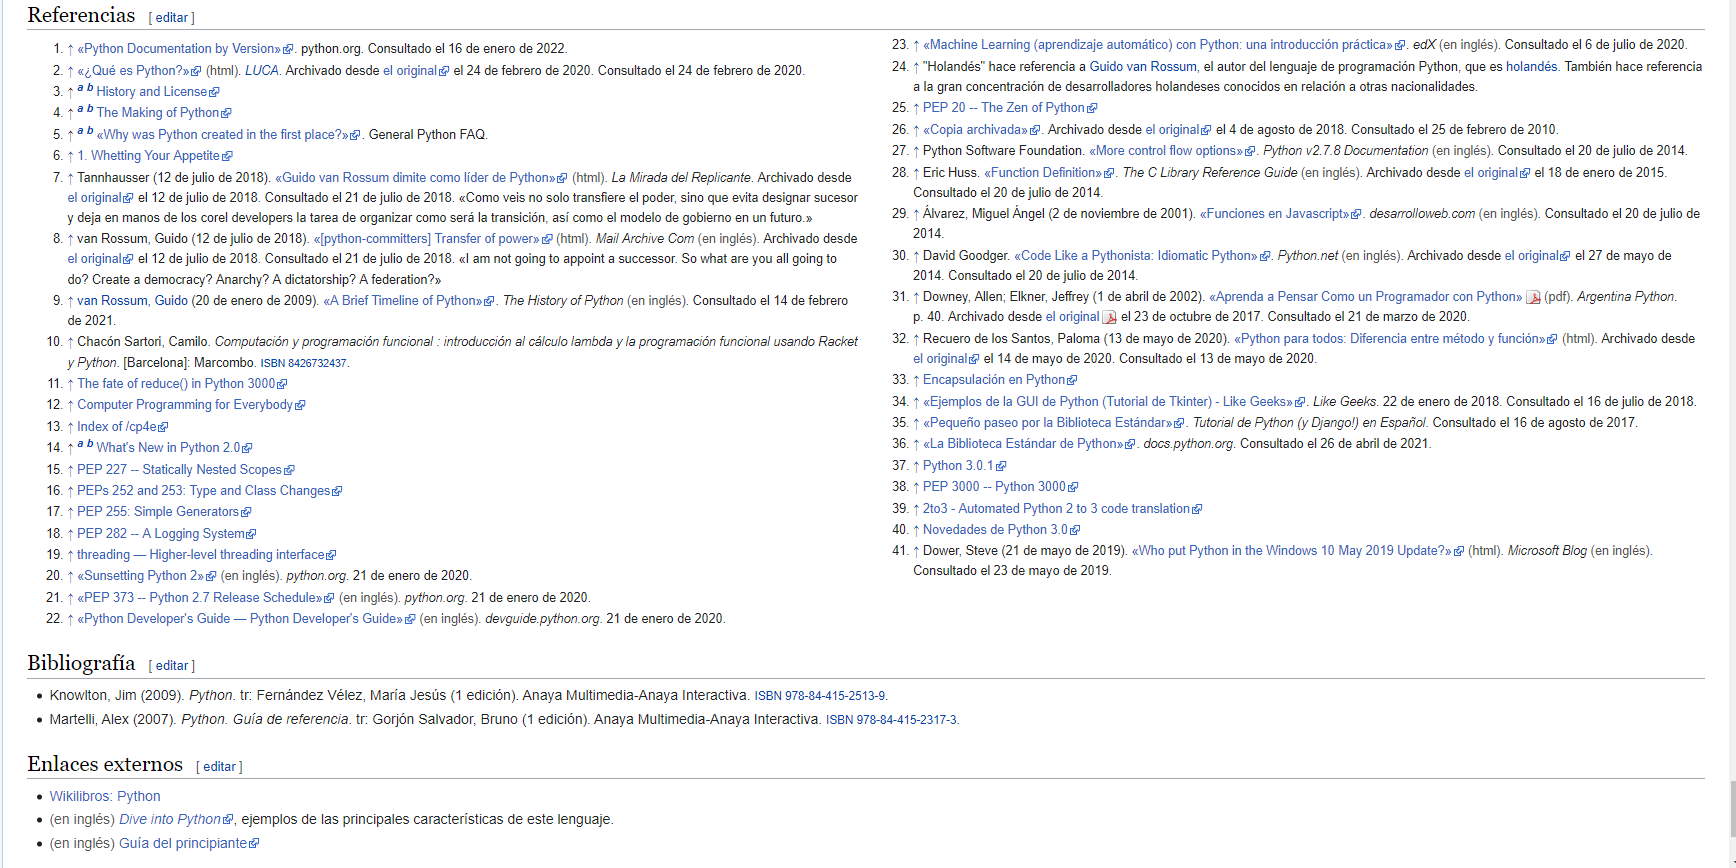

In [6]:
html = requests.get("https://es.wikipedia.org/wiki/Python")
soup = BeautifulSoup(html.content, "html.parser")

In [ ]:
#al inspeccionar el html vemos que el div que contiene la informacion que queremos, tiene el classname de "listaref"
data = soup.find('div', attrs={'class': 'listaref'})

for div in data:
  links = div.findAll('a')
  for a in links:
    if a['href'].startswith('http'):
      print(a['href'])

## Extraer texto.

In [4]:
from bs4 import BeautifulSoup
import requests
html = requests.get("https://es.wikipedia.org/wiki/Python")
soup = BeautifulSoup(html.content, "html.parser")

In [ ]:
#primera aproximacion
print(soup.get_text())

In [ ]:
# otra aproximacion es ir a buscar el cuerpo del articulo
soup.find("body")

In [ ]:
# podemos aplicar un filtro, para asi obtener todas las etiquetas p
soup.find("body").find_all("p")

In [10]:
elems = soup.find("body").find_all("p")

## Limpiar texto.

Podremos limpiar el texto obtenido del html, eliminando las etiquetas de la siguiente manera.

In [13]:
# este paquete nos ayudara para filtrar las etiquetas htlm y asi obtener el texto limpio
import re

def limpiarhtlm(html):
  expresion = re.compile('<.*?>')
  texto = re.sub(expresion, '', html)
  return texto

In [ ]:
#y asi podemos obtener el texto limpio sin etiquetas html
for elem in elems:
  print(limpiarhtlm(str(elem)))


## Links relacionados wikipedia

In [16]:
from bs4 import BeautifulSoup
import requests, requests

pagina = requests.get("https://es.wikipedia.org/wiki/Python")
soup = BeautifulSoup(pagina.content, 'html.parser')

In [ ]:
# para la obtencion de los links, lo que hacemos es filtrar el htlm y nos quedamos solo con las etiquetas a
# de estas buscamos aquellas que tengan atributo de href y que cumplan que empiezan con http://
# de esta forma obtendremos todos los links que apunten fuera de la pagina web
for link in soup.findAll('a', attrs={'href': re.compile("http://")}):
  print(link.get('href'))

In [ ]:
# ahora si queremos obtener los links que apunten dentro de la wikipedia hariamos lo siguiente:
baselink = "https://es.wikipedia.org"

for link in soup.findAll('a'):
  if str(link.get('href'))[0] == "/" and str(link.get('href'))[1] != "/":
    print(baselink + link.get('href'))

Bajo estos conceptos pueden surgir programas interesantes, asi como aquel que dado una pagina madre de wikipedia vaya navegando por todos sus links relacionados y buscando informacion de todas estas paginas a medida que va extendiendose por la "red" a este concepto se lo conoce como **spieder** o **crawler**